# Описание проекта

### *Мы работаем аналитиками в  крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.*

### *Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты*
<a class="anchor" id="описание"></a>

## Часть 1. Приоритизация гипотез. 

#### В файле *hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача:

- [Подготовка данных к анализу](#prepare)

- [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#ICE)

- [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#RICE)

- [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло](#prio)

## Часть 2. Анализ A/B-теста

#### Мы провели A/B-тест и получили результаты, которые описаны в файлах *orders.csv и visitors.csv*

### Задача:

***Проанализируйте A/B-тест:***

- [1.Постройте график кумулятивной выручки по группам](#1)

- [2.Постройте график кумулятивного среднего чека по группам](#2)

- [3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A](#3)

- [4.Постройте график кумулятивной конверсии по группам](#4)

- [5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A](#5)

- [6.Постройте точечный график количества заказов по пользователям](#6)

- [7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей](#7)

- [8.Постройте точечный график стоимостей заказов](#8)

- [9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов](#9)

- [10.Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным](#10)

- [11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#11)

- [12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным](#12)

- [13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#13)

- [14.Принятие решения по результатам теста](#14)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(12, 10)})

import scipy.stats as stats
from scipy import stats as st

import datetime as dt

import math

import numpy as np

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('C:/Users/COVIDisLIE/Downloads/hypothesis.csv'),   
    pd.read_csv('C:/Users/COVIDisLIE/Downloads/orders.csv',sep=','),
    pd.read_csv('C:/Users/COVIDisLIE/Downloads/visitors.csv',sep=',')
)
except:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'), 
    pd.read_csv('/datasets/orders.csv',sep=','), 
    pd.read_csv('/datasets/visitors.csv',sep=',') 
)

### Подготовим данные к анализу <a class="anchor" id="prepare"></a>

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [6]:
hypothesis.duplicated().sum()

0

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.rename(columns={'transactionId':'orderId', 'visitorId':'userId'}, inplace=True) #переименуем столбцы в заказы и пользователей

In [10]:
orders.isna().sum()

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors.duplicated().sum()

0

<div class="alert alert-info"> Количество групп в А/Б тесте</div>

In [16]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

<div class="alert alert-info">  В исследовании действительно две группы: А и В. Они равны общему количеству 1197 записей</div>

<div class="alert alert-info">  За какой период доступны данные?</div>

In [17]:
print('Дата начала исследования:', orders['date'].min())
      
print('Дата конца исследования:', orders['date'].max())

Дата начала исследования: 2019-08-01
Дата конца исследования: 2019-08-31


<div class="alert alert-info">  Нам предоставлены данные за весь август 2019 года</div>

<div class="alert alert-info"> Проведем проверку, что пользователи не попадают в обе группы</div>

In [18]:
not_uniq_users = orders.groupby(['userId']).agg({'group' : 'nunique', 'orderId' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {not_uniq_users[not_uniq_users.group != 1]["userId"].count()}')

Пользователей, попавших в обе группы: 58


<div class="alert alert-info">  Нашлось 58 пользователей, которые попали в обе группы, можем их исключить из анализа, хотя скорее всего такое количество не повлияет на дальнейший анализ</div>

In [19]:
not_uniq_users_list = list(not_uniq_users[not_uniq_users.group != 1]['userId'])
orders_clean = orders.query('userId not in @not_uniq_users_list')

[Наверх к описанию](#описание)

## Часть 1. Приоритизация гипотез

* ### **Применяем фреймворк ICE** <a class="anchor" id="ICE"></a>

In [20]:
pd.options.display.max_colwidth = 210 #код, чтобы отобразить все данные в таблицах

In [21]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)

In [22]:
hypothesis.sort_values('ICE', ascending=False).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


* ### **Применяем фреймворк RICE** <a class="anchor" id="RICE"></a>

In [23]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [24]:
hypothesis.sort_values('RICE', ascending=False).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<a class="anchor" id="prio"></a>
* ### *Вывод: скорее всего, из-за того, что в RICE берется в расчет то, скольких пользователей затронет изменение(Reach), то и приоритизация гипотез поменялась по этой зависимости.* 
### *Так, в нашем случае, перспективной гипотезой оказалась №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", хотя в ICE фреймворке была другая (№8. Запустить акцию, дающую скидку на товар в день рождения"), но из-за параметра охвата равному 10 побеждает гипотеза позиции №7.*

[Наверх к описанию](#описание)

## Часть 2. Анализ A/B-теста

In [25]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_clean[['date','group']].drop_duplicates() 

In [26]:
# получаем агрегированные накапливаемые по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
# получаем агрегированные накапливаемые по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [28]:
# объединяем накапливаемые данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845
5  2019-08-03     B      54      53   288850      1803
6  2019-08-04     A      77      71   388030      2562
7  2019-08-04     B      68      66   385740      2573
8  2019-08-05     A      99      92   474413      3318
9  2019-08-05     B      89      87   475648      3280


[Наверх к описанию](#описание)

### 1. Постройте график кумулятивной выручки по группам <a class="anchor" id="1"></a>

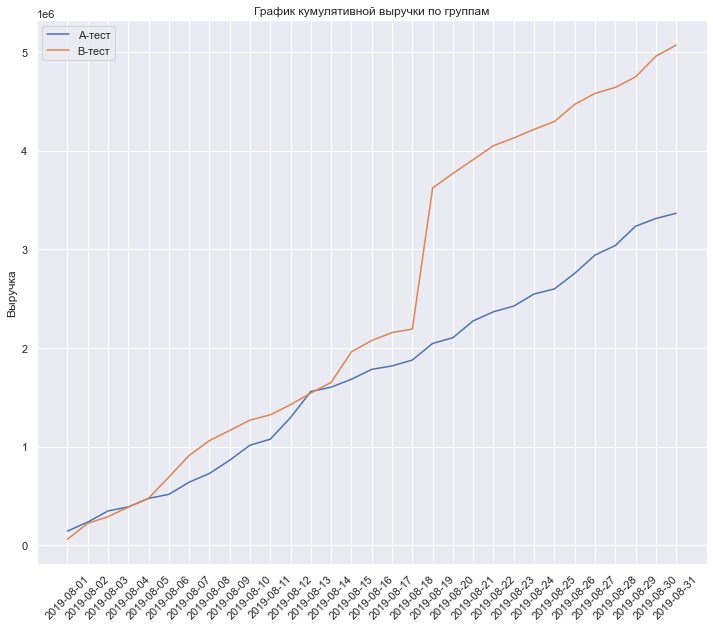

In [29]:
# датафрейм с накапливаемым количеством заказов и накапливаемой выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с накапливаемым количеством заказов и накапливаемой выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='А-тест')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='В-тест')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)

plt.legend(); 

[Наверх к описанию](#описание)

**Вывод:** *У B-теста наблюдается резкий скачок, возможно, это какая-то аномалия в виде дорогого заказа. А-тест растет без значительных колебаний*

### 2. Постройте график кумулятивного среднего чека по группам <a class="anchor" id="2"></a>

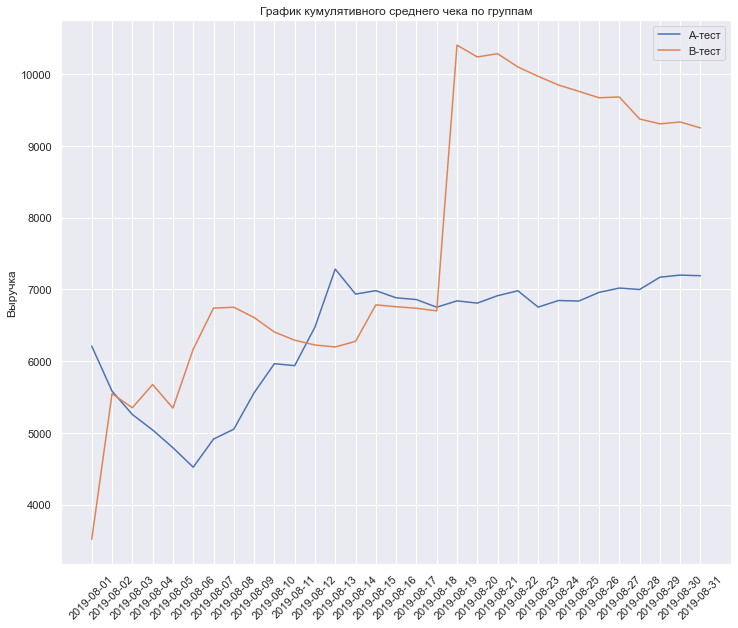

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='А-тест')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='В-тест')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend();

**Вывод:** *Наблюдаем такой же скачок у В-теста, в то время, как А-тест ведет себя более "спокойно"*

[Наверх к описанию](#описание)

### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A <a class="anchor" id="3"></a>

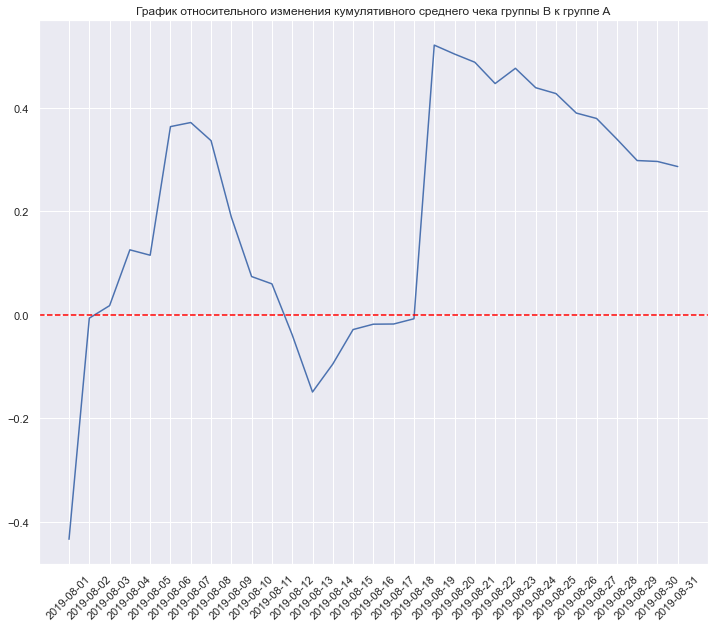

In [31]:
# собираем данные в одной таблице
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--'); 

**Вывод:** *Определенно есть аномальное значение, так как наблюдаются резкий скачок. В целом, все три графика показывают одно и то же по-своему, что где-то есть какой-то слишком дорогой заказ*

[Наверх к описанию](#описание)

### 4. Постройте график кумулятивной конверсии по группам <a class="anchor" id="4"></a>

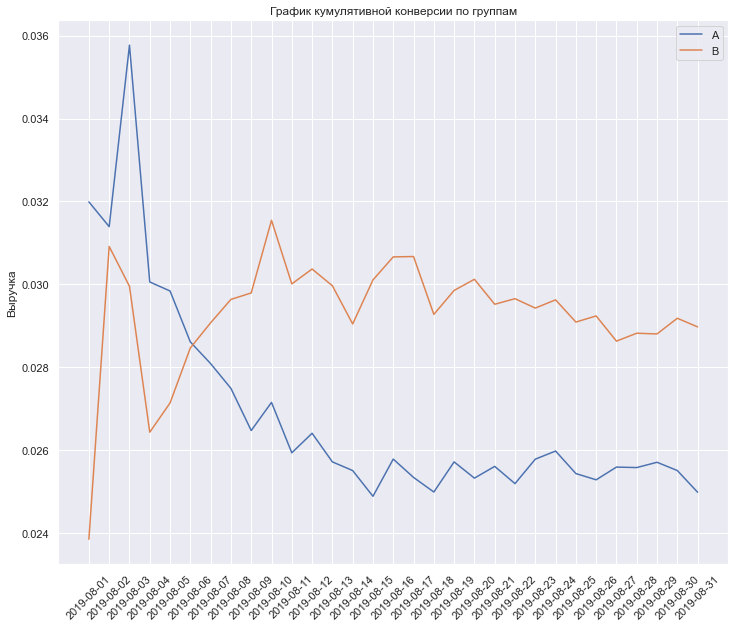

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend();

**Вывод:** *Наблюдался пик у обоих тестов, но конверсия у В-теста в последствии росла и выглядит намного лучше, чем у А-теста, у которого после скачка она просела и пошла на спад*

[Наверх к описанию](#описание)

### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A <a class="anchor" id="5"></a>

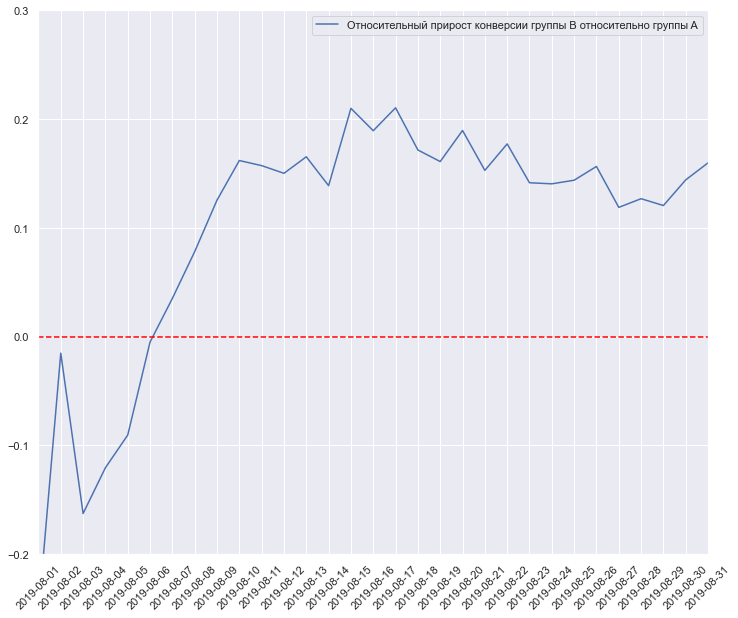

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation=45)

plt.axhline(y=0, color='red', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]);

**Вывод:** *При запуске исследования в первые дни В-тест колебался и проигрывал А-тесту, но затем начался рост до 20% относительно А-теста, где-то 15 августа начался небольшой спад, но все равно В-тест лучше, чем группа А.* 

*Без аналитики аномалий делать выводы рано, так как отношение конверсии ещё не установилось.*

[Наверх к описанию](#описание)

### 6. Постройте точечный график количества заказов по пользователям <a class="anchor" id="6"></a>

*Соберем пользователей по количеству заказов*

In [34]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


**Вывод:** *Есть пользователи, которые заказывали 9-11 раз. Посмотрим на гистограмму*

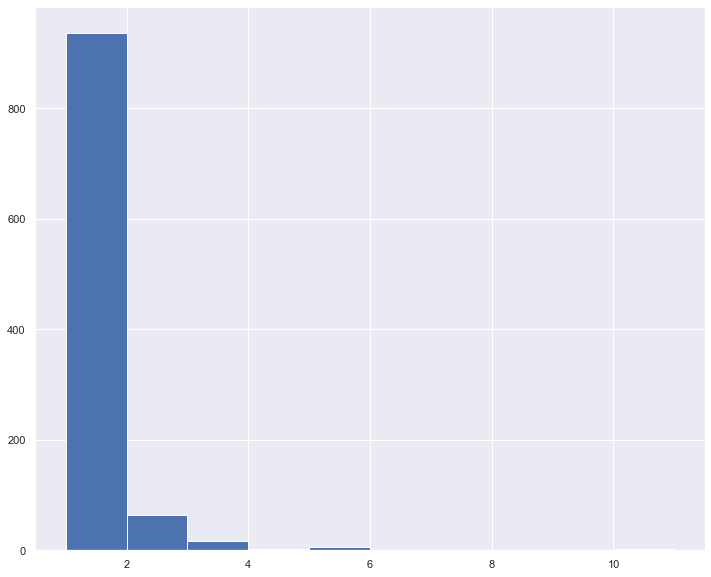

In [35]:
plt.hist(ordersByUsers['orders']); 

**Вывод:** *Видно, что в основном заказывают 1, максимум 2 раза. Посмотрим еще на точечную диаграмму*

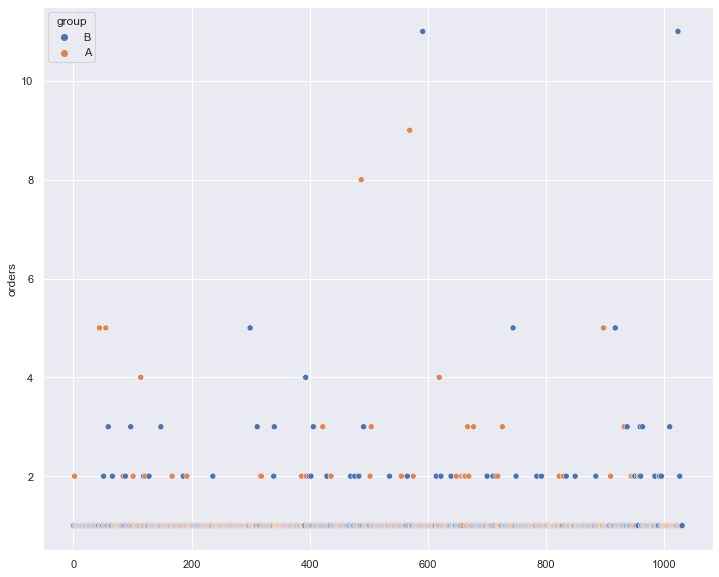

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

sns.scatterplot(data=orders, x=x_values, y=ordersByUsers['orders'], hue="group");

**Вывод:** *Видим, что пользователей заказавших более 2 раз больше, чем казалось и не ясно считать ли их аномалиями, посчитаем выборочные перцентили количества заказов на одного пользователя*

[Наверх к описанию](#описание)

### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей <a class="anchor" id="7"></a>

In [37]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод:** *Не более 5% пользователей совершали от двух заказов и более. И не более 1% пользователей совершали больше четырех заказов.
Пользователей с 4 заказами и более можно принять за аномальных*

### 8. Постройте точечный график стоимостей заказов <a class="anchor" id="8"></a>

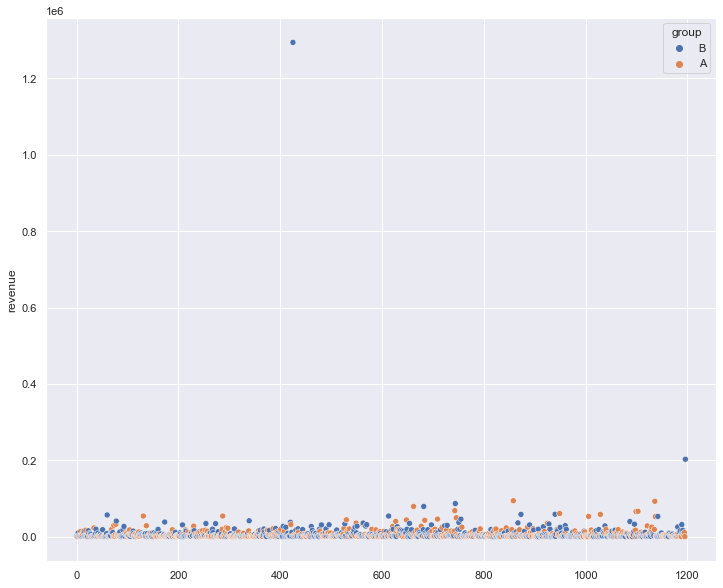

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))

sns.scatterplot(data=orders, x=x_values, y=orders['revenue'], hue="group");

**Вывод:** *Есть два явно дорогих заказа, похожие на аномальные значения и выбивающиеся из общего количества заказов, также имеются, которые возможно и вызывают те самые резкие колебания на графиках*

[Наверх к описанию](#описание)

<div class="alert alert-info"> Группировка "почищенных" пользователей</div>

In [39]:
clean_ordersByUsers = (
    orders_clean.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

clean_ordersByUsers.columns = ['userId', 'orders']

clean_ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


<div class="alert alert-info">  Точечный график количества заказов "почищенных" пользователей</div>

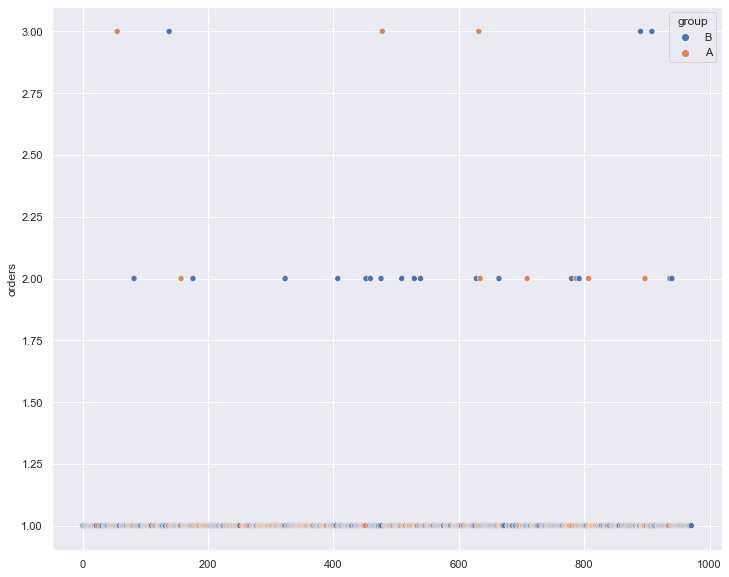

In [40]:
x_values = pd.Series(range(0,len(clean_ordersByUsers)))

sns.scatterplot(data=orders_clean, x=x_values, y=clean_ordersByUsers['orders'], hue="group");

<div class="alert alert-info"> Самое большое количество пользователей совершило 1 заказ, немного - 2 заказа и всего семеро 3 заказа </div>

In [41]:
print(np.percentile(clean_ordersByUsers['orders'], [95, 99]))

[1. 2.]


In [42]:
anomaly_order = np.percentile(clean_ordersByUsers['orders'], [95, 99])[1]

<div class="alert alert-info"> Не более 5% совершили 1 заказ и больше, менее 1% пользователей сделали 2 заказа </div>

<div class="alert alert-info">  Точечный график стоимостей "почищенных пользователей" </div>

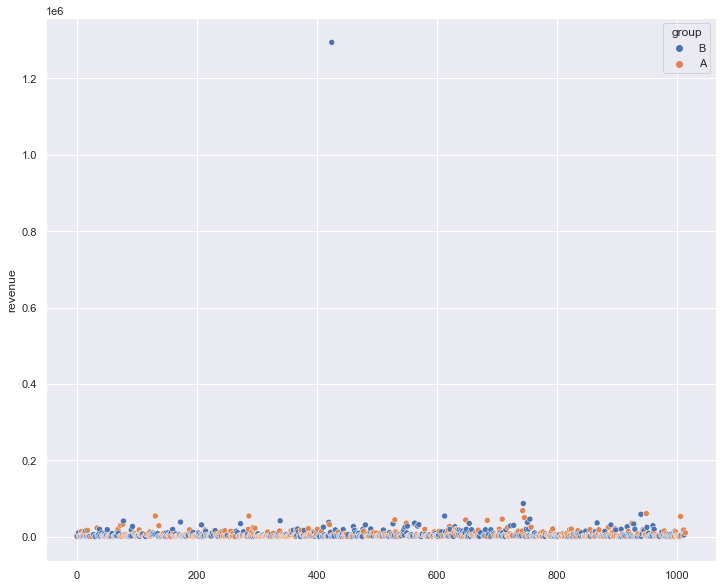

In [43]:
x_value = pd.Series(range(0,len(orders_clean['revenue'])))
sns.scatterplot(data=orders_clean, x=x_value, y=orders_clean['revenue'], hue="group");

### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов <a class="anchor" id="9"></a>

In [44]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод:** *У 5% заказ дороже 28000 у.е. И не больше 1% заказали от 58233 у.е.*

In [45]:
print(np.percentile(orders_clean['revenue'], [95, 99])) 

[26785. 53904.]


In [46]:
anomaly_price = np.percentile(orders_clean['revenue'], [95, 99])[0]

<div class="alert alert-info">  У 5% заказ дороже 26785 у.е. И не больше 1% заказали от 53904 у.е. </div>

### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным <a class="anchor" id="10"></a>

* **Посчитаем агрегированные накапливаемые данные по дням о посетителях групп А и В**

In [47]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

* **Посчитаем аггрегированные и накапливаемые данные о заказах и выручке для А и В групп и затем объединим по дате все полученные данные в одну таблицу**

In [48]:
ordersADaily = (
    orders_clean[orders_clean['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_clean[orders_clean['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


      Пояснения для столбцов:

**ordersPerDateA** — *количество заказов в выбранную дату в группе A;*

**revenuePerDateA** — *суммарная выручка в выбранную дату в группе A;*

**ordersPerDateB** — *количество заказов в выбранную дату в группе B;*

**revenuePerDateB** — *суммарная выручка в выбранную дату в группе B;*

**ordersCummulativeA** — *суммарное число заказов до выбранной даты включительно в группе A;*

**revenueCummulativeA** — *суммарная выручка до выбранной даты включительно в группе A;*

**ordersCummulativeB** — *суммарное количество заказов до выбранной даты включительно в группе B;*

**revenueCummulativeB** — *суммарная выручка до выбранной даты включительно в группе B;*

**visitorsPerDateA** — *количество пользователей в выбранную дату в группе A;*

**visitorsPerDateB** — *количество пользователей в выбранную дату в группе B;*

**visitorsCummulativeA** — *количество пользователей до выбранной даты включительно в группе A;*

**visitorsCummulativeB** — *количество пользователей до выбранной даты включительно в группе B.*

* **Создадим переменные ordersByUsersA и ordersByUsersB *со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов**

In [49]:
ordersByUsersA = (
    orders_clean[orders_clean['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders_clean[orders_clean['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

* **Создадим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули**

In [50]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Выдвигаем гипотезы:**

*Н0 - различия в конверсии между группами по «сырым» данным статистически не значимы*

*Н1 - различия в конверсии между группами по «сырым» данным статистически значимы*

*Значение alpha примем 0.05*

In [52]:
print('Значение p-value:'' ''{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост В-теста:'' ''{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value: 0.011
Относительный прирост В-теста: 0.160


**Вывод:** *Так как p-value меньше 0.05 нулевую гипотезу отвергаем. Между тест-группами есть статистически значимые различия, а относительный прирост конверсии B-теста к конверсии А-теста равен 16%.*

[Наверх к описанию](#описание)

### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным <a class="anchor" id="11"></a>

**Выдвигаем гипотезы:**

*Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы*

*Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы*

*Значение alpha примем 0.05*

In [53]:
print(
    'Значение p-value:'' ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue']
        )[1]
    )
)
print(
    'Относительное различие среднего чека:'' ''{0:.3f}'.format(
        orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1)
) 

Значение p-value: 0.829
Относительное различие среднего чека: 0.287


**Вывод:** *p-value сильно больше 0.05, нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B значительно выше среднего чека группы A на 29%*

[Наверх к описанию](#описание)

### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным <a class="anchor" id="12"></a>

*Мы уже выясняли до этого, что аномальными пользователями можно принять тех, кто совершил больше 2 заказов и дороже 26785 у.е.*

In [54]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > anomaly_order]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > anomaly_order]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_clean[orders_clean['revenue'] > anomaly_price]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: userId, dtype: int64
58


<div class="alert alert-info"> Получили 58 аномальных пользователей </div>

**Выдвигаем гипотезы:**

*Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы*

*Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы*

*Значение alpha примем 0.05*

***Подготовим выборки количества заказов по пользователям по группам теста***

In [55]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [56]:
print('Значение p-value:'' ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост В-теста:'' ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение p-value: 0.012
Относительный прирост В-теста: 0.182


**Вывод:** *p-value меньше 0.05, соответственно отвергаем нулевую гипотезу. Относительный прирост по очищенным данным группы B к группе А ненамного увеличился и равен 18%*

[Наверх к описанию](#описание)

### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным <a class="anchor" id="13"></a>

**Выдвигаем гипотезы:**

*Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы*

*Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы*

*Значение alpha примем 0.05*

In [57]:
print(
    'Значение p-value:'' ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'A',
                    np.logical_not(orders_clean['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'B',
                    np.logical_not(orders_clean['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие среднего чека после очистки данных:''{0:.3f}'.format(
        orders_clean[
            np.logical_and(
                orders_clean['group'] == 'B',
                np.logical_not(orders_clean['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_clean[
            np.logical_and(
                orders_clean['group'] == 'A',
                np.logical_not(orders_clean['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value: 0.646
Относительное различие среднего чека после очистки данных:-0.048


**Вывод:** *p-value снова больше 0.05, поэтому нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между группами практически нулевое*

### 14. Принятие решения по результатам теста <a class="anchor" id="14"></a>

### По полученным данным, можем принять решение: 

### *Остановить тест и зафиксировать победу группы В, хоть и статистически значимых различий по среднему чеку между группами нет ни по "сырым" данным, ни по "очищенным" , но по конверсии группа В намного лучше, чем группа А, то же самое подтверждают и наши графики, выполненные ранее.*

### *На них группа В выглядит увереннее и имеет тенденции к росту или хотя бы держится у средних значений*

<div class="alert alert-info"> <b>Выводы о проделанной работе:</b> 
 
1. В данных имеются заказы за август 2019 года. Всего в таблице с заказами 1197 транзакций. Имеются две группы теста, А и В. Было 58 пользователей, которые попали в обе группы, мы почистили от них данные, но это несильно повлияло на результаты.  
    
    
2. Наиболее перспективной гипотезой по RICE оказалась №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", хотя в ICE фреймворке была другая (№8. Запустить акцию, дающую скидку на товар в день рождения"), но из-за параметра охвата(Reach) равному 10 побеждает гипотеза позиции №7. 

    
3. Были изучены кумулятивные метрики:
    - по графикам выручки, среднего чека и относительного изменения кумулятивного среднего чека группы B к группе A было обнаружено, что в данных присутствует некие аномальные значения в виде слишком дорогих заказов;
    - по графику кумулятивной конверсии по группам наблюдался пик у обеих групп, но конверсия у В-теста в последствии росла и выглядит намного лучше, чем у А-теста, у которого после скачка она просела и пошла на спад;
    - по графику относительного изменения кумулятивной конверсии группы B к группе A при запуске исследования в первые дни В-тест колебался и проигрывал А-тесту, но затем начался рост до 20% относительно А-теста, где-то 15 августа начался небольшой спад, но все равно В-группа лучше, чем группа А.
    

4. Изучили аномальные заказы и их стоимость: самое большое количество пользователей совершило 1 заказ, немного - 2 заказа и всего семеро 3 заказа. Присутствуют несколько очень дорогих заказов, но в основном не больше, чем 5% пользователей совершили заказ дороже 26785 у.е. И не больше 1% заказали от 53904 у.е.
    
    
5. Изучили статистическую значимость различий в среднем чеке и конверсии по "сырым" и "очищенным" данным:
    - Конверсия по "сырым" данным. Так как p-value меньше 0.05 нулевую гипотезу отвергли. Между тест-группами есть статистически значимые различия, а относительный прирост конверсии B-теста к конверсии А-теста равен 16%;
    - Конверсия по "очищенным" данным. Здесь p-value меньше 0.05, соответственно отвергаем нулевую гипотезу. Относительный прирост по очищенным данным группы B к группе А ненамного увеличился и равен 18%;
    - Средний чек по "сырым" данным. Р-value сильно больше 0.05, нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B значительно выше среднего чека группы A на 29%;
    - Средний чек по "очищенным" данным. Р-value снова больше 0.05, поэтому нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. И относительное различие среднего чека между группами практически нулевое.
    
    
6. По полученным данным, можем принять решение:
Остановить тест и зафиксировать победу группы В, хоть и статистически значимых различий по среднему чеку между группами нет ни по "сырым" данным, ни по "очищенным" , но по конверсии группа В намного лучше, чем группа А, то же самое подтверждают и наши графики, выполненные ранее.
На них группа В выглядит увереннее и имеет тенденции к росту или хотя бы держится у средних значений
    
</div>

[Наверх к описанию](#описание)